Debido al hecho de que GitHub realiza una representación estática de los cuadernos y no incluye el HTML/JavaScript incrustado que forma un gráfico de trama, y teniendo en cuenta que para presentar la información de una forma más amena e interactiva se hizo uso de la librería Plotly de Python la cual crea este tipo de gráficas combinadas con HTML, no es posible verlas directamente en este Notebook, por lo que lo invitamos a observar este mismo Notebook de forma renderizada en el link de [acá](https://colab.research.google.com/drive/1uwoA4n3wOl78dCpV1AUQycdQWNr2Ou_C?usp=sharing) el cual es un Gooogle Colab con el código que le permitirá interactuar con el mismo

# 1.  Evaluaciones Agropecuarias Municipales – EVA. 2019 - 2023. Base Agrícola

  Este conjunto de datos, obtenido de los disponibles para el concurso, brinda información sobre "el área, la producción y el rendimiento de la actividad agropecuaria municipal". En total se presenta la información para 1103 municipios, incluyendo cerca de 200 productos de la canasta agropecuaria. (Información tomada de la descripción del conjunto de datos)

Primero importamos las librerías necesarias para leer y realizar las visualizaciones pertinentes

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
# import plotly.io as pio
# pio.renderers.default = "plotly_mimetype"

In [2]:
df = pd.read_csv("Evaluaciones_Agropecuarias_Municipales_2019_2023.csv")

In [3]:
df

Código Dane departamento Departamento  Código Dane municipio  \
0                              5    Antioquia                   5002   
1                              5    Antioquia                   5002   
2                              5    Antioquia                   5002   
3                              5    Antioquia                   5002   
4                              5    Antioquia                   5002   
...                          ...          ...                    ...   
115567                        47    Magdalena                  47980   
115568                        47    Magdalena                  47980   
115569                        47    Magdalena                  47980   
115570                        47    Magdalena                  47980   
115571                        47    Magdalena                  47980   

            Municipio        Grupo cultivo             Subgrupo   Cultivo  \
0           Abejorral             Frutales       Demás frutales  Aguacate   
1           Abejorral             Frutales       Demás frutales  Aguacate   
2           Abejorral             Frutales       Demás frutales  Aguacate   
3           Abejorral             Frutales       Demás frutales  Aguacate   
4           Abejorral             Frutales       Demás frutales  Aguacate   
...               ...                  ...                  ...       ...   
115567  Zona Bananera  Raíces y tubérculos  Raíces y tubérculos      Yuca   
115568  Zona Bananera  Raíces y tubérculos  Raíces y tubérculos      Yuca   
115569  Zona Bananera  Raíces y tubérculos  Raíces y tubérculos      Yuca   
115570  Zona Bananera  Raíces y tubérculos  Raíces y tubérculos      Yuca   
115571  Zona Bananera  Raíces y tubérculos  Raíces y tubérculos      Yuca   

            Desagregación cultivo   Año Periodo  Área sembrada  \
0       Aguacate demás variedades  2019    2019          807.0   
1                   Aguacate Hass  2020    2020          857.0   
2                   Aguacate Hass  2021    2021         1007.0   
3                   Aguacate Hass  2022    2022         4307.0   
4                   Aguacate Hass  2023    2023         3807.0   
...                           ...   ...     ...            ...   
115567     Yuca consumo en fresco  2021   2021B           90.0   
115568     Yuca consumo en fresco  2022   2022A           97.0   
115569     Yuca consumo en fresco  2022   2022B           92.0   
115570     Yuca consumo en fresco  2023   2023A          100.0   
115571     Yuca consumo en fresco  2023   2023B          100.0   

        Área cosechada  Producción  Rendimiento Ciclo del cultivo  \
0                506.0      9614.0        19.00        Permanente   
1                707.0     13433.0        19.00        Permanente   
2                707.0     13433.0        19.00        Permanente   
3               3857.0     73283.0        19.00        Permanente   
4               1007.0     19133.0        19.00        Permanente   
...                ...         ...          ...               ...   
115567            80.0       770.0         9.62       Transitorio   
115568            82.0       902.0        11.00       Transitorio   
115569            97.0      1067.0        11.00       Transitorio   
115570            92.0      1012.0        11.00       Transitorio   
115571           100.0      1100.0        11.00       Transitorio   

       Estado físico del cultivo  Código del cultivo  \
0                      En fresco             2040299   
1                      En fresco             2040201   
2                      En fresco             2040201   
3                      En fresco             2040201   
4                      En fresco             2040201   
...                          ...                 ...   
115567                 En fresco             1081001   
115568                 En fresco             1081001   
115569                 En fresco             1081001   
115570                 En fresco    

In [4]:
df = df.drop(columns=['Código Dane departamento', 'Código Dane municipio','Código del cultivo'])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115572 entries, 0 to 115571
Data columns (total 15 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Departamento                   115572 non-null  object 
 1   Municipio                      115572 non-null  object 
 2   Grupo cultivo                  115572 non-null  object 
 3   Subgrupo                       115572 non-null  object 
 4   Cultivo                        115572 non-null  object 
 5   Desagregación cultivo          115572 non-null  object 
 6   Año                            115572 non-null  int64  
 7   Periodo                        115572 non-null  object 
 8   Área sembrada                  115572 non-null  float64
 9   Área cosechada                 115572 non-null  float64
 10  Producción                     115572 non-null  float64
 11  Rendimiento                    115572 non-null  float64
 12  Ciclo del cultivo             

In [6]:
df.describe()

Año  Área sembrada  Área cosechada    Producción  \
count  115572.000000  115572.000000   115572.000000  1.155720e+05   
mean     2021.106107     233.692232      214.304479  3.214476e+03   
std         1.399749    1165.780022     1108.192961  4.881239e+04   
min      2019.000000       0.000000        0.000000  0.000000e+00   
25%      2020.000000       6.000000        5.000000  2.299500e+01   
50%      2021.000000      20.000000       18.105000  1.080000e+02   
75%      2022.000000      97.000000       85.000000  5.750000e+02   
max      2023.000000   60000.000000    61000.000000  4.776340e+06   

         Rendimiento  
count  115572.000000  
mean       10.692571  
std        15.886380  
min         0.000000  
25%         1.900000  
50%         6.000000  
75%        13.000000  
max       640.000000

Para la siguiente gráfica vemos el porcentaje de producción total separado por departamento

In [7]:
# Agrupar la producción total por departamento
produccion_por_departamento = df.groupby('Departamento')['Producción'].sum().reset_index()

# Calcular el porcentaje de producción para cada departamento
total_produccion = produccion_por_departamento['Producción'].sum()
produccion_por_departamento['Porcentaje'] = (produccion_por_departamento['Producción'] / total_produccion) * 100

# Filtrar los departamentos con producción significativa (>2%) y agrupar el resto como "Otros"
umbral = 0.9  # Define el umbral mínimo para considerar un departamento como significativo
departamentos_significativos = produccion_por_departamento[produccion_por_departamento['Porcentaje'] > umbral]
departamentos_no_significativos = produccion_por_departamento[produccion_por_departamento['Porcentaje'] <= umbral]

# Crear la categoría "Otros"
otros = pd.DataFrame({
    'Departamento': ['Otros'],
    'Producción': [departamentos_no_significativos['Producción'].sum()],
    'Porcentaje': [departamentos_no_significativos['Porcentaje'].sum()]
})

# Combinar los departamentos significativos con la categoría "Otros"
produccion_final = pd.concat([departamentos_significativos, otros])

# Crear el gráfico circular
fig = px.pie(produccion_final, names='Departamento', values='Producción', title='Porcentaje de Producción por Departamentos')

# Mostrar el gráfico interactivo
fig.show()


In [8]:
produccion_por_departamento = df.groupby('Departamento')['Producción'].sum().reset_index()
produccion_por_departamento = produccion_por_departamento.sort_values(by='Producción', ascending=False).head(10)
top_departamentos = produccion_por_departamento['Departamento'].tolist()

In [9]:
top_departamentos

['Valle del Cauca',
 'Cauca',
 'Antioquia',
 'Cundinamarca',
 'Santander',
 'Meta',
 'Boyacá',
 'Nariño',
 'Tolima',
 'Huila']

También es importante conocer la proporción de la producción por cada grupo de cultivo en todo el país

In [10]:
# Agrupar los datos por Grupo cultivo y sumar la producción
produccion_por_grupo = df.groupby('Grupo cultivo')['Producción'].sum().reset_index()

# Crear el gráfico circular
fig = px.pie(
    produccion_por_grupo,
    names='Grupo cultivo',
    values='Producción',
    title='Porcentaje de Producción por Grupo de Cultivo',
)

# Personalizar el gráfico para mostrar solo los porcentajes más altos
fig.update_traces(
    textposition='inside',
    textinfo='percent'  # Muestra solo los porcentajes
)

# Mostrar el gráfico
fig.show()


Es posible observar que hay una gran concentración de la producción en el departamento del Valle del Cauca, por lo que será pertinente conocer más sobre la información que se tiene de este departamento.

A continuación se observa la proporción de los grupos de cultivos para el Valle del Cauca

In [11]:
# Filtrar los datos para el departamento de Valle del Cauca
valle_data = df[df['Departamento'] == 'Valle del Cauca']

# Agrupar por Grupo cultivo y sumar la producción
produccion_por_grupo = valle_data.groupby('Grupo cultivo')['Producción'].sum().reset_index()

# Calcular el porcentaje de producción para cada grupo de cultivo en Valle del Cauca
total_produccion_valle = produccion_por_grupo['Producción'].sum()
produccion_por_grupo['Porcentaje'] = (produccion_por_grupo['Producción'] / total_produccion_valle) * 100

# Crear el gráfico circular con Plotly
fig = px.pie(produccion_por_grupo, names='Grupo cultivo', values='Producción',
             title='Porcentaje de Producción por Grupo de Cultivo en Valle del Cauca')

# Ajustar el margen superior para evitar que los porcentajes se superpongan con el título
fig.update_layout(margin=dict(t=200))  # Aumentar el margen superior (t=top)

# Mostrar el gráfico interactivo
fig.show()


In [12]:
cultivos_valle = valle_data[(valle_data['Grupo cultivo']=='Cultivos tropicales tradicionales')]
cultivos_valle['Cultivo'].unique()

array(['Cacao', 'Café', 'Algodón', 'Caña'], dtype=object)

In [13]:
# Agrupar por Grupo cultivo y sumar la producción
produccion_por_cultivo = cultivos_valle.groupby('Cultivo')['Producción'].sum().reset_index()

# Calcular el porcentaje de producción para cada grupo de cultivo en Valle del Cauca
total_produccion_cultivos_valle = produccion_por_cultivo['Producción'].sum()
produccion_por_cultivo['Porcentaje'] = (produccion_por_cultivo['Producción'] / total_produccion_cultivos_valle) * 100

# Crear el gráfico circular con Plotly
fig = px.pie(produccion_por_cultivo, names='Cultivo', values='Producción',
             title='Porcentaje de Producción por Grupo de Cultivo en Valle del Cauca')

# Ajustar el margen superior para evitar que los porcentajes se superpongan con el título
fig.update_layout(margin=dict(t=200))  # Aumentar el margen superior (t=top)

# Mostrar el gráfico interactivo
fig.show()


Lo que sucede con la Caña es que se obtiene una muy alta producción por área cosechada, lo que genera un desbalance en comparación con el resto de los cultivos

In [14]:
# Agrupar los datos por grupo de cultivo, sumando área y producción
cultivo_data = df.groupby('Grupo cultivo').agg(
    {'Área cosechada': 'sum', 'Producción': 'sum'}
).reset_index()

# Crear el scatter plot
fig = px.scatter(
    cultivo_data,
    x='Área cosechada',
    y='Producción',
    color='Grupo cultivo',
    size='Producción',  # Ajusta el tamaño de las burbujas en función de la producción total
    title="Relación entre Área Cosechada y Producción por Grupo de Cultivo",
    labels={'Área cosechada': 'Área Cosechada (ha)', 'Producción': 'Producción (ton)'}
)

# Agregar línea de tendencia (opcional)
fig.update_traces(marker=dict(opacity=0.7, line=dict(width=1, color='DarkSlateGrey')))
fig.update_layout(showlegend=True)

# Mostrar el gráfico
fig.show()


Esta gráfica interactiva de dispersión por área cosechada vs producción puede dar una idea de la relación posiblemente lineal que hay entre estas dos variables, sin embargo, es posible observar que esta relación tiene proporcionalidades variadas, dependiendo del grupo de cultivo, lo que puede dar ideas de un posible modelo de clustering para identificar las necesidades específicas de cada grupo.

In [15]:
max_row = df.loc[df['Producción'].idxmax()]

# Display the entire row
max_row

Departamento                                       Valle del Cauca
Municipio                                                  Palmira
Grupo cultivo                    Cultivos tropicales tradicionales
Subgrupo                         Cultivos tropicales tradicionales
Cultivo                                                       Caña
Desagregación cultivo                               Caña de azúcar
Año                                                           2021
Periodo                                                       2021
Área sembrada                                              33900.0
Área cosechada                                             33900.0
Producción                                               4776340.5
Rendimiento                                                  140.9
Ciclo del cultivo                                       Permanente
Estado físico del cultivo                             Caña o verde
Nombre científico del cultivo                Saccharum officinarum
Name: 68167, dtype: object

De acuerdo con https://www.asocana.org/publico/info.aspx?Cid=215

nos da la producción de caña para 2022, por lo que vamos a comparar con los datos.

In [16]:
# Filtramos el DataFrame para obtener los datos de cultivo de caña en el Valle del Cauca para 2022
filtered_df = df[(df['Departamento'] == 'Valle del Cauca') &
                 (df['Cultivo'] == 'Caña') &
                 (df['Año'] == 2022)]

# Sum the values in the 'Producción' column
total_produccion = filtered_df['Producción'].sum()

print(f"\nTotal Producción: {total_produccion}")


Total Producción: 24604639.67


Lo cual es acorde con los valores registrados

In [17]:
import plotly.express as px

# Agrupar los datos por Grupo cultivo y Año, sumando el Área sembrada y Área cosechada
datos_agregados = df.groupby(['Grupo cultivo', 'Año'])[['Área sembrada', 'Área cosechada']].sum().reset_index()

# Obtener la lista única de los grupos de cultivo
grupos_cultivo = datos_agregados['Grupo cultivo'].unique()

# Crear un gráfico para cada Grupo cultivo
for grupo in grupos_cultivo:
    # Filtrar datos para el grupo de cultivo actual
    datos_grupo = datos_agregados[datos_agregados['Grupo cultivo'] == grupo]

    # Crear gráfico de barras para el grupo de cultivo actual
    fig = px.bar(
        datos_grupo,
        x='Año',
        y=['Área sembrada', 'Área cosechada'],
        title=f'Área Sembrada y Cosechada por Año para {grupo}',
        labels={'value': 'Área (hectáreas)', 'variable': 'Tipo de área'},
        barmode='group'
    )

    # Mostrar el gráfico
    fig.show()


En estas gráficas de área sembrada y cosechada por año, para cada grupo cultivo es posible determinar que cada uno de estos presenta características y contextos diferentes, que los han llevado a trazar tendencias propias y que será útil estudiar desde un punto de vista más global, incluyendo patrones del clima, sociales y políticos

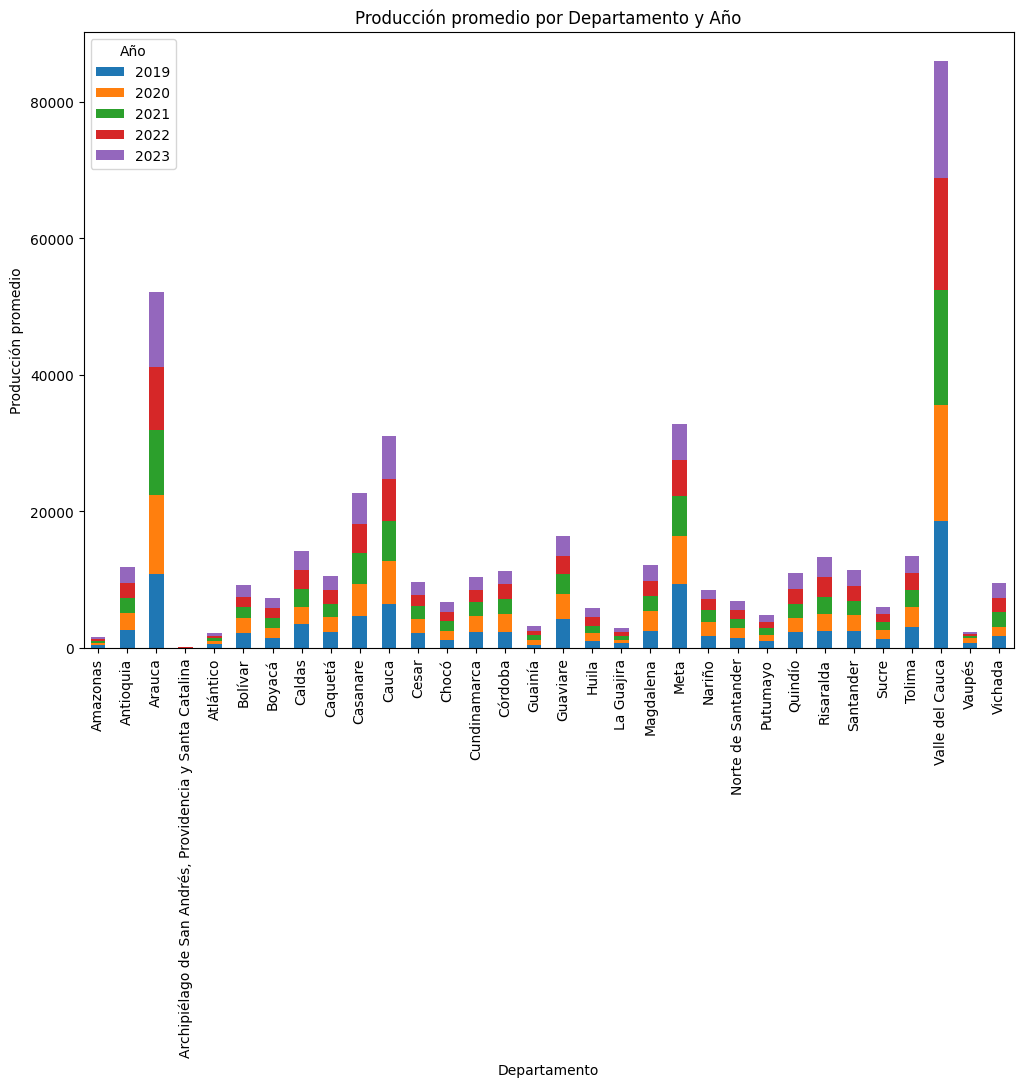

In [18]:
#promedio de producción por departamento y año
prod_por_depto = df.groupby(['Departamento', 'Año'])['Producción'].mean().unstack()
prod_por_depto.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.ylabel("Producción promedio")

#plt.xticks(rotation=60)
plt.title("Producción promedio por Departamento y Año")

plt.show()


In [19]:
import plotly.express as px
import plotly.subplots as sp

# Crear una figura de subplots con 3 columnas para los gráficos individuales
fig = sp.make_subplots(rows=1, cols=3, subplot_titles=("Área sembrada vs Área cosechada",
                                                       "Producción vs Área sembrada",
                                                       "Producción vs Área cosechada"))

# Gráfico 1: Área sembrada vs Área cosechada
scatter1 = px.scatter(df, x='Área sembrada', y='Área cosechada', title="Área sembrada vs Área cosechada")
for trace in scatter1['data']:
    fig.add_trace(trace, row=1, col=1)
fig.update_xaxes(title_text="Área sembrada (hectáreas)", row=1, col=1)
fig.update_yaxes(title_text="Área cosechada (hectáreas)", row=1, col=1)

# Gráfico 2: Producción vs Área sembrada
scatter2 = px.scatter(df, x='Área sembrada', y='Producción', title="Producción vs Área sembrada")
for trace in scatter2['data']:
    fig.add_trace(trace, row=1, col=2)
fig.update_xaxes(title_text="Área sembrada (hectáreas)", row=1, col=2)
fig.update_yaxes(title_text="Producción (toneladas)", row=1, col=2)

# Gráfico 3: Producción vs Área cosechada
scatter3 = px.scatter(df, x='Área cosechada', y='Producción', title="Producción vs Área cosechada")
for trace in scatter3['data']:
    fig.add_trace(trace, row=1, col=3)
fig.update_xaxes(title_text="Área cosechada (hectáreas)", row=1, col=3)
fig.update_yaxes(title_text="Producción (toneladas)", row=1, col=3)

# Ajustar diseño
fig.update_layout(height=500, width=1200, title_text="Relaciones específicas entre variables agrícolas")
fig.show()


In [20]:
# Gráfico de cajas para la distribución del Rendimiento por Estado Físico del Cultivo
fig2 = px.box(df, x='Estado físico del cultivo', y='Rendimiento', title='Distribución del Rendimiento por Estado Físico del Cultivo')
fig2.update_xaxes(tickangle=45)  # Rotación de etiquetas en el eje X
fig2.show()